In [70]:
from datetime import datetime, timezone, timedelta
import numpy as np
import pandas as pd
import cbpro
import matplotlib.pyplot as plt
public_client = cbpro.PublicClient()

# https://docs.pro.coinbase.com/#introduction

In [60]:
dt = datetime(2021, 5, 21)

# end = int(dt.replace(tzinfo=timezone.utc).timestamp())
# dt = dt+timedelta(days=-30)
# start = int(dt.replace(tzinfo=timezone.utc).timestamp())

data_arr = []

for _ in range(600):
    end = dt.isoformat()
    dt = dt+timedelta(days=-10)
    start = dt.isoformat()

    r = public_client.get_product_historic_rates('BTC-USD', 
                                                 granularity=3600,
                                                 start=start, end=end)

    data = pd.DataFrame(r)
    data.iloc[:,0] = pd.to_datetime(data.iloc[:,0]*1000000000)
    data.columns = ['Date', 'low', 'high', 'open', 'close', 'volume']
    data_arr.append(data)

IndexError: single positional indexer is out-of-bounds

In [71]:
result = pd.concat(data_arr)
result.drop_duplicates(inplace=True)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


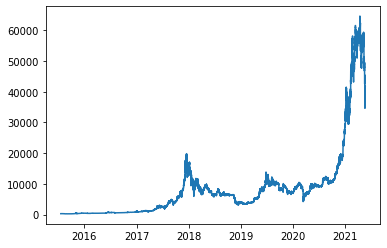

In [75]:
plt.plot(result.loc[:, 'Date'], result.loc[:,'close'])

In [90]:
result.loc[:,'UTC hour'] = result.Date.apply(lambda x: x.hour)

In [259]:
result

,Date,low,high,open,close,volume,UTC hour
0,2021-05-21 00:00:00,40581.66,42275.99,40623.24,41789.95,2155.999509,0
1,2021-05-20 23:00:00,40340.85,41794.35,41523.71,40623.33,2315.159119,23
2,2021-05-20 22:00:00,39581.63,41854.22,40776.38,41523.70,1992.781595,22
3,2021-05-20 21:00:00,39802.36,40918.36,40078.60,40776.37,966.421745,21
4,2021-05-20 20:00:00,39747.30,40697.44,40229.88,40075.38,1180.377400,20
...,...,...,...,...,...,...,...
23,2015-07-21 01:00:00,280.35,281.15,280.89,280.36,380.933023,1
24,2015-07-21 00:00:00,279.38,281.00,279.96,280.89,288.177976,0
25,2015-07-20 23:00:00,278.15,280.00,278.31,280.00,376.627552,23
26,2015-07-20 22:00:00,277.37,278.50,278.00,278.14,346.995411,22


In [260]:
result_23 = result.loc[result.loc[:,'UTC hour']==23,['Date', 'open']]

result_23.Date

1     2021-05-20 23:00:00
25    2021-05-19 23:00:00
49    2021-05-18 23:00:00
73    2021-05-17 23:00:00
97    2021-05-16 23:00:00
              ...        
169   2015-07-24 23:00:00
193   2015-07-23 23:00:00
217   2015-07-22 23:00:00
1     2015-07-21 23:00:00
25    2015-07-20 23:00:00
Name: Date, Length: 2130, dtype: datetime64[ns]

In [261]:
d = [datetime(result_23.Date.iloc[i].year,
             result_23.Date.iloc[i].month, 
             result_23.Date.iloc[i].day) for i in range(len(result_23))]

result_23.loc[:,'Date1'] = d

In [262]:
future = pd.read_csv('../data/btc future and reference rate/btc_future_brr.csv')
future.iloc[:,1]= pd.to_datetime(future.iloc[:,1])
future = future.iloc[:,[1,2]]
future.columns = ['Date', 'Close']

In [263]:
brr = pd.read_csv('../data/btc future and reference rate/btc_future_brr.csv')
brr.iloc[:,1]= pd.to_datetime(brr.iloc[:,1])
brr = brr.iloc[:,[1,-1]]
brr.columns = ['Date', 'Close']
# future = pd.read_excel('../data/btc future and reference rate/btc_future_brr.xlsx')
brr.sort_values('Date', ascending=False, inplace=True)
brr.dropna(inplace=True)

In [264]:
# future = pd.read_excel('../data/btc future and reference rate/btc_future_brr.xlsx')
future.sort_values('Date', ascending=False, inplace=True)
future.dropna(inplace=True)

In [265]:
future

,Date,Close
0,2021-05-21,41055.0
1,2021-05-20,40320.0
2,2021-05-19,39340.0
3,2021-05-18,43150.0
4,2021-05-17,44060.0
...,...,...
1393,2017-12-21,15330.0
1394,2017-12-20,17040.0
1395,2017-12-19,18200.0
1396,2017-12-18,19100.0


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


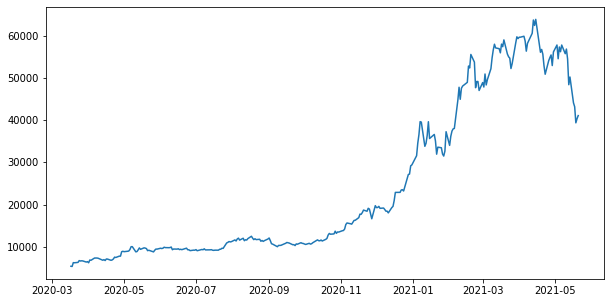

In [266]:
plt.figure(figsize=(10,5))

length = 300
plt.plot(future.Date[:length], future.Close[:length])

In [267]:
future

,Date,Close
0,2021-05-21,41055.0
1,2021-05-20,40320.0
2,2021-05-19,39340.0
3,2021-05-18,43150.0
4,2021-05-17,44060.0
...,...,...
1393,2017-12-21,15330.0
1394,2017-12-20,17040.0
1395,2017-12-19,18200.0
1396,2017-12-18,19100.0


In [268]:
M = pd.merge(future, result_23, left_on='Date', right_on='Date1' )
M.dropna(inplace=True)
M = M.iloc[:,[0,1,3]]
M.columns = ['Date', 'future close', 'btc close']
M.sort_values('Date', ascending=False, inplace=True)
M.reset_index(drop=True, inplace=True)

In [269]:
M.dropna(inplace=True)
np.sum(M.isna())

Date            0
future close    0
btc close       0
dtype: int64

In [270]:
M.loc[:,'log return bitcoin'] = np.log(M.loc[:,'btc close']/M.loc[:,'btc close'].shift(-1))
M.loc[:,'log return future'] = np.log(M.loc[:,'future close']/M.loc[:,'future close'].shift(-1))
M.dropna(inplace=True)

In [271]:
M

,Date,future close,btc close,log return bitcoin,log return future
0,2021-05-20,40320.0,41523.71,0.057936,0.024606
1,2021-05-19,39340.0,39186.36,-0.089401,-0.092441
2,2021-05-18,43150.0,42851.05,-0.001992,-0.020870
3,2021-05-17,44060.0,42936.49,-0.151618,-0.130263
4,2021-05-14,50190.0,49965.88,0.021767,0.037039
...,...,...,...,...,...
857,2017-12-22,14135.0,15452.97,-0.019707,-0.081158
858,2017-12-21,15330.0,15760.52,-0.039538,-0.105752
859,2017-12-20,17040.0,16396.15,-0.062299,-0.065858
860,2017-12-19,18200.0,17450.10,-0.077166,-0.048267


In [272]:
from statsmodels.distributions.empirical_distribution import ECDF

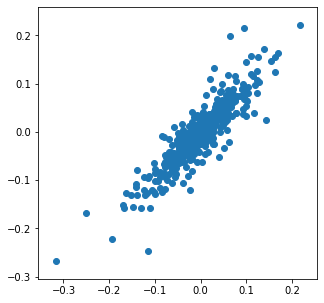

In [273]:
rs = M.iloc[:,-2]
rf = M.iloc[:,-1]

ecdf_rs = ECDF(rs)
ecdf_rf = ECDF(rf)

plt.figure(figsize=(5,5))
plt.scatter(rs, rf)

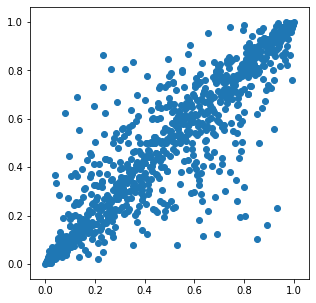

In [274]:
plt.figure(figsize=(5,5))
plt.scatter(ecdf_rs(rs), ecdf_rf(rf))

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


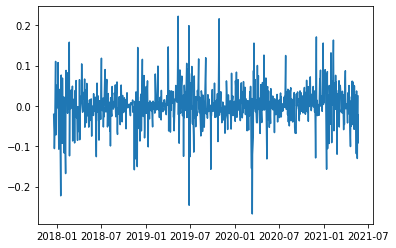

In [275]:
plt.plot(M.Date, M.iloc[:,-1])

In [276]:
M.loc[:, 'btc close']

0      41523.71
1      39186.36
2      42851.05
3      42936.49
4      49965.88
         ...   
857    15452.97
858    15760.52
859    16396.15
860    17450.10
861    18849.97
Name: btc close, Length: 862, dtype: float64

In [278]:
M1 = pd.merge(M, brr, on='Date')
M1.rename(columns={'Close':'brr'}, inplace=True)
M1.head(60)

,Date,future close,btc close,log return bitcoin,log return future,brr
0,2021-05-20,40320.0,41523.71,0.057936,0.024606,41861.09
1,2021-05-19,39340.0,39186.36,-0.089401,-0.092441,35734.10
2,2021-05-18,43150.0,42851.05,-0.001992,-0.020870,43118.61
3,2021-05-17,44060.0,42936.49,-0.151618,-0.130263,44384.66
4,2021-05-14,50190.0,49965.88,0.021767,0.037039,50769.13
5,2021-05-13,48365.0,48890.00,-0.078637,-0.118415,50586.73
6,2021-05-12,54445.0,52889.77,-0.065592,-0.042433,56641.72
7,2021-05-11,56805.0,56475.20,0.003193,0.019554,55787.27
8,2021-05-10,55705.0,56295.18,-0.014079,-0.036227,57415.03
9,2021-05-07,57760.0,57093.38,0.009321,0.027736,57081.64
